<a href="https://colab.research.google.com/github/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/img_matching_with_dl.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Applying Deep Learning for image matching

## 1.) About the feature extraction and image matching

There are some methods within the evolution of feature extraction and image matching:

![](https://github.com/OSGeoLabBp/tutorials/blob/master/english/machine_learning/lessons/data/img_matching_evo.png?raw=true)

In the following we are focusing on the Deep Learning-based solutions. If we want to start dealing with DL-based feature extraction and image mapping, a good starting point is the GitHub page of the [3DOM-FKB](https://github.com/3DOM-FBK/deep-image-matching), where we can find severeal options. These are summerized in the folllowing tables:

Supported Extractors | Supported Matchers
---|---
✓ [SuperPoint](https://github.com/rpautrat/SuperPoint) |	✓ [Lightglue (with Superpoint, Disk, and ALIKED)](https://github.com/cvg/LightGlue)
✓ [DISK](https://github.com/cvlab-epfl/disk) |	✓ [SuperGlue (with Superpoint)](https://github.com/magicleap/SuperGluePretrainedNetwork)
✓ [ALIKE]((https://github.com/magicleap/SuperGluePretrainedNetwork) |	✓ [LoFTR](https://zju3dv.github.io/loftr/)
✓ [ALIKED](ALIKED) |	☐ [SE2-LoFTR](https://github.com/georg-bn/se2-loftr)
☐ Superpoint free |	✓ [Nearest neighbor (with KORNIA Descriptor Matcher)](https://kornia.readthedocs.io/en/v0.6.4/_modules/kornia/feature/matching.html)
✓ [KeyNet + OriNet + HardNet8](https://kornia.readthedocs.io/en/latest/feature.html) | ✓ [RoMa](https://github.com/Parskatt/RoMa)
✓ [ORB (opencv)](https://docs.opencv.org/3.4/d1/d89/tutorial_py_orb.html) |	☐ [GlueStick](https://github.com/cvg/GlueStick)
✓ [SIFT (opencv)](https://docs.opencv.org/4.x/da/df5/tutorial_py_sift_intro.html)
✓ [DeDoDe](https://github.com/Parskatt/DeDoDe)


Some of these are supported and can be used in Sfm software, like [COLMAP](https://colmap.github.io), [Agisoft Metashape](https://www.agisoft.com) and other software that supports [bundler](https://github.com/snavely/bundler_sfm) format.

## 2.) Preparation

First, we have to download the sample images in a folder.

In [1]:
!mkdir -p /content/custom_example/ && rm -rf /content/custom_example/* # clear previously uploaded images
!mkdir -p /content/custom_example/images

!wget -q -O /content/custom_example/images/sh1.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/sh1.jpg
!wget -q -O /content/custom_example/images/sh2.jpg https://raw.githubusercontent.com/OSGeoLabBp/tutorials/master/hungarian/image_processing/data/sh2.jpg

After that, we have to download the deep-image-matching repo from GitHub:

In [2]:
!git clone https://github.com/3DOM-FBK/deep-image-matching.git

Cloning into 'deep-image-matching'...
remote: Enumerating objects: 5145, done.
remote: Counting objects: 100% (954/954), done.
remote: Compressing objects: 100% (306/306), done.
remote: Total 5145 (delta 651), reused 859 (delta 591), pack-reused 4191
Receiving objects: 100% (5145/5145), 251.78 MiB | 21.29 MiB/s, done.
Resolving deltas: 100% (3006/3006), done.
Updating files: 100% (558/558), done.


And we have to install the dependencies:

In [ ]:
%%bash
cd ./deep-image-matching
pip3 install -e .
pip3 install pycolmap==0.4.0

Then, we can start working on applying the codes on our own data.

## 3.) Applying DL for feature extraction and image matching

We will apply the SuperPoint-based feature extractor with LightGlue image matcher in the following. The Deep-Image-Matching contains the pre-trained weights of LightGlue with SuperPoint.

Some information about the models:
- SuperPoint: https://arxiv.org/pdf/1712.07629.pdf
- LightGlue: https://arxiv.org/pdf/2306.13643.pdf

SuperPoint network is a fully convolutional deep neural network trained to detect interest points and compute their accompanying descriptors.




TODO - More info about the models.

Run feature extration and mathing on custom images:

In [4]:
 %%bash
python3 ./deep-image-matching/main.py \
  --dir /content/custom_example \
  --pipeline superpoint+lightglue \
  --config ./deep-image-matching/config/superpoint+lightglue.yaml

Using a custom configuration file: /content/deep-image-matching/config/superpoint+lightglue.yaml
Config general:
{'db_path': None,
 'geom_verification': <GeometricVerification.PYDEGENSAC: 1>,
 'gv_confidence': 0.99999,
 'gv_threshold': 4,
 'image_dir': PosixPath('/content/custom_example/images'),
 'matching_strategy': 'matching_lowres',
 'min_inlier_ratio_per_pair': 0.25,
 'min_inliers_per_pair': 10,
 'min_matches_per_tile': 10,
 'output_dir': PosixPath('/content/custom_example/results_superpoint+lightglue_matching_lowres_quality_high'),
 'overlap': 1,
 'pair_file': PosixPath('/content/custom_example/results_superpoint+lightglue_matching_lowres_quality_high/pairs.txt'),
 'quality': <Quality.HIGH: 3>,
 'retrieval': 'netvlad',
 'skip_reconstruction': False,
 'tile_overlap': 10,
 'tile_preselection_size': 1000,
 'tile_selection': <TileSelection.NONE: 0>,
 'tile_size': (2400, 2000),
 'try_match_full_images': False,
 'upright': False,
 'verbose': False}


Config extractor:
{'fix_sampling': 

Downloading: "https://github.com/cvg/LightGlue/releases/download/v0.1_arxiv/superpoint_v1.pth" to /root/.cache/torch/hub/checkpoints/superpoint_v1.pth
100%|██████████| 4.96M/4.96M [00:00<00:00, 147MB/s]
Downloading: "https://github.com/cvg/LightGlue/releases/download/v0.1_arxiv/superpoint_lightglue.pth" to /root/.cache/torch/hub/checkpoints/superpoint_lightglue_v0-1_arxiv.pth
100%|██████████| 45.3M/45.3M [00:00<00:00, 287MB/s]
100%|██████████| 2/2 [00:00<00:00, 177.32it/s]
1it [00:00, 1427.61it/s]
100%|██████████| 2/2 [00:00<00:00, 677.16it/s]
1it [00:00, 876.37it/s]


Visualize results

In [5]:
# Pass to --images argument the names of the images (e.g. "img01.jpg img02.jpg")
# their ids (e.g. "1 2") to visualize verified matches inside COLMAP database (change --type ['names', 'ids'])

%%bash
python3 ./deep-image-matching/show_matches.py \
  --images "1 2" \
  --type ids \
  --database /content/custom_example/results_superpoint+lightglue_matching_lowres_quality_high/database.db \
  --imgsdir /content/custom_example/images \
  --output /content/custom_example/matches.png

database path: /content/custom_example/results_superpoint+lightglue_matching_lowres_quality_high/database.db
output dir: /content/custom_example/matches.png
images:  {'type': 'ids', 'data': ('1', '2')}
Loading database..
Showing matches..
Img 1: kpts shape = (3809, 2)
Img 2: kpts shape = (4107, 2)
raw matches shape (1832, 2)
verified matches shape (1832, 2)
img0_path /content/custom_example/images/sh1.jpg
img1_path /content/custom_example/images/sh2.jpg


Load the matches.

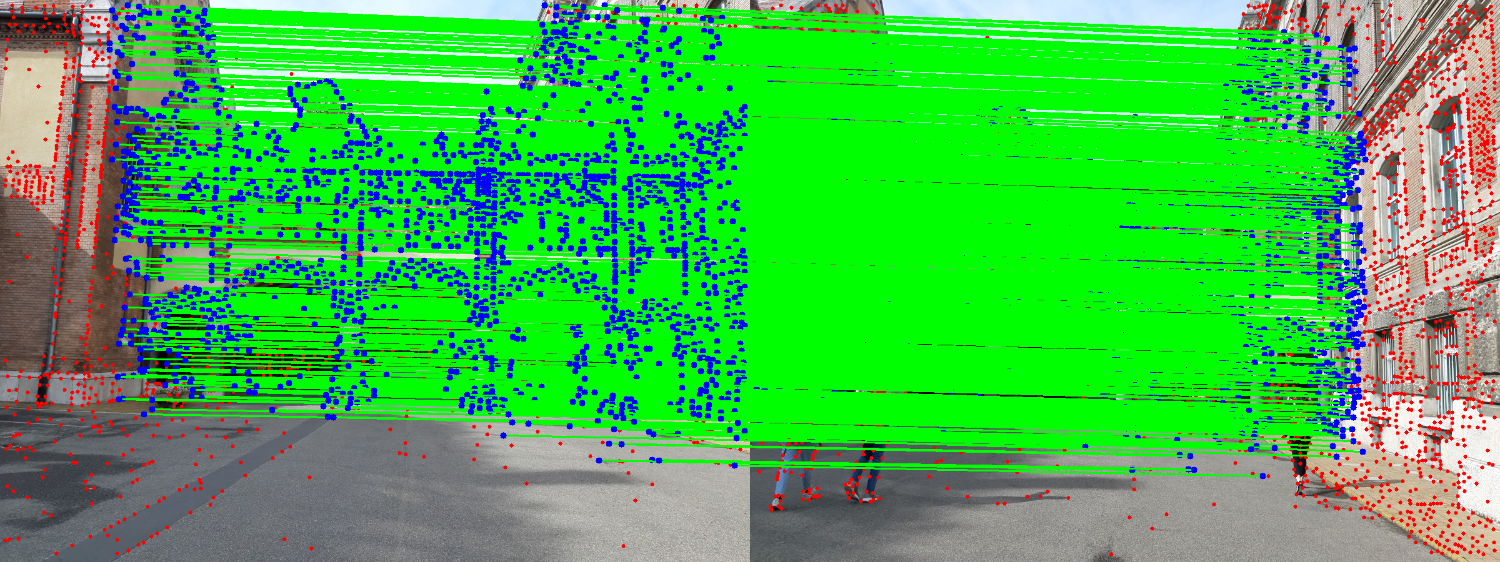

In [6]:
import cv2
from google.colab.patches import cv2_imshow

image_path1 = "/content/custom_example/matches.png"
image1 = cv2.imread(image_path1)
cv2_imshow(image1)


## 4.) Visualizing keypoints with Open3D

First, we need to install Open3D module.

In [ ]:
!pip install open3d

Let's import modules!

In [10]:
import os
import shutil
import random
import numpy as np
import open3d as o3d
import matplotlib.pyplot as plt
import plotly.graph_objects as go

The coordinates of the keypoints can be found in the ./custom_example/reconstruction folder as a text file (points3D.txt) and a . PLY file.

In [9]:
pc_filename = '/content/custom_example/results_superpoint+lightglue_matching_lowres_quality_high/reconstruction/rec.ply'

Let's visualize the keypoints in Google Colab. The Open3D has its built-in function, but it's not working on Google Colab. Therefore, we are going to use the following function to visualize the result.

In [12]:
def draw_geometries(geometries):
    '''
    This function replaces the built-in Open3D method to visualize point clouds in the Google Colab environment.
    If you are using your computer, this function is not required.
    The function is using the plotly library.
    '''
    graph_objects = []

    for geometry in geometries:
        geometry_type = geometry.get_geometry_type()

        if geometry_type == o3d.geometry.Geometry.Type.PointCloud:
            points = np.asarray(geometry.points)
            colors = None
            if geometry.has_colors():
                colors = np.asarray(geometry.colors)
            elif geometry.has_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.normals) * 0.5
            else:
                geometry.paint_uniform_color((1.0, 0.0, 0.0))
                colors = np.asarray(geometry.colors)

            scatter_3d = go.Scatter3d(x=points[:,0], y=points[:,1], z=points[:,2], mode='markers', marker=dict(size=2, color=colors))
            graph_objects.append(scatter_3d)

        if geometry_type == o3d.geometry.Geometry.Type.TriangleMesh:
            triangles = np.asarray(geometry.triangles)
            vertices = np.asarray(geometry.vertices)
            colors = None
            if geometry.has_triangle_normals():
                colors = (0.5, 0.5, 0.5) + np.asarray(geometry.triangle_normals) * 0.5
                colors = tuple(map(tuple, colors))
            else:
                colors = (1.0, 0.0, 0.0)

            mesh_3d = go.Mesh3d(x=vertices[:,0], y=vertices[:,1], z=vertices[:,2], i=triangles[:,0], j=triangles[:,1], k=triangles[:,2], facecolor=colors, opacity=0.50)
            graph_objects.append(mesh_3d)

    fig = go.Figure(
        data=graph_objects,
        layout=dict(
            scene=dict(
                xaxis=dict(visible=False),
                yaxis=dict(visible=False),
                zaxis=dict(visible=False),
                aspectmode = 'data', #this string can be 'data', 'cube', 'auto', 'manual'
                aspectratio=dict(x=1, y=1, z=1)
            )
        )
    )
    fig.show()

Let's visualize the points!

In [13]:
pcd = o3d.io.read_point_cloud(pc_filename)
o3d.visualization.draw_geometries = draw_geometries # replace function
o3d.visualization.draw_geometries([pcd])

### 5.) Sources

- https://isprs-archives.copernicus.org/articles/XLIII-B2-2022/77/2022/isprs-archives-XLIII-B2-2022-77-2022.pdf
- https://github.com/3DOM-FBK/deep-image-matching
- https://zju3dv.github.io/loftr/
- https://psarlin.com/superglue/
- https://arxiv.org/pdf/2306.13643.pdf

